In [112]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine

In [114]:
# Establish DB connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create dataframe
edu = pd.read_sql_query('select * from useducation', con=engine)

# Disconnect
engine.dispose()

In [115]:
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [116]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [117]:
# Create copy of dataframe
edu2 = edu.copy()

In [118]:
# Impute variable mean values for missing values
columns_mean = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
               'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
               'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G',
               'GRADES_ALL_G']

for column in columns_mean:
    edu2[column].fillna(edu2[column].mean(), inplace=True)

In [119]:
edu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

### Derive the descriptive statistics of the data and discuss the points you find remarkable. 

In [120]:
edu2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Discussion Points:
- Federal Revenue makes up a large portion of Total Revenue.
- Average Total Expenditure is greater than Average Total Revenue means operating at a budget deficit.
- Instruction Expenditure makes up a large portion of Total Expenditure.

### Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates. 

In [121]:
# Create total revenue and total expenditure dataframes
texas = edu2[edu2['STATE'] == 'TEXAS']
texas_total_rev = edu2[edu2['STATE'] == 'TEXAS'][['YEAR', 'TOTAL_REVENUE']].sort_values(by='YEAR')
texas_total_exp = edu2[edu2['STATE'] == 'TEXAS'][['YEAR', 'TOTAL_EXPENDITURE']].sort_values(by='YEAR')

In [122]:
# Descriptive stats for Texas Total Revenue and Expenditure
edu2[edu2['STATE'] == 'TEXAS'][['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].describe()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
count,2.600000e+01,2.600000e+01
mean,3.581071e+07,3.722592e+07
std,1.396273e+07,1.469438e+07
min,9.092082e+06,9.196681e+06
25%,2.343999e+07,2.418425e+07
50%,3.559918e+07,3.774206e+07
75%,4.932279e+07,5.055987e+07
max,5.828416e+07,5.931488e+07


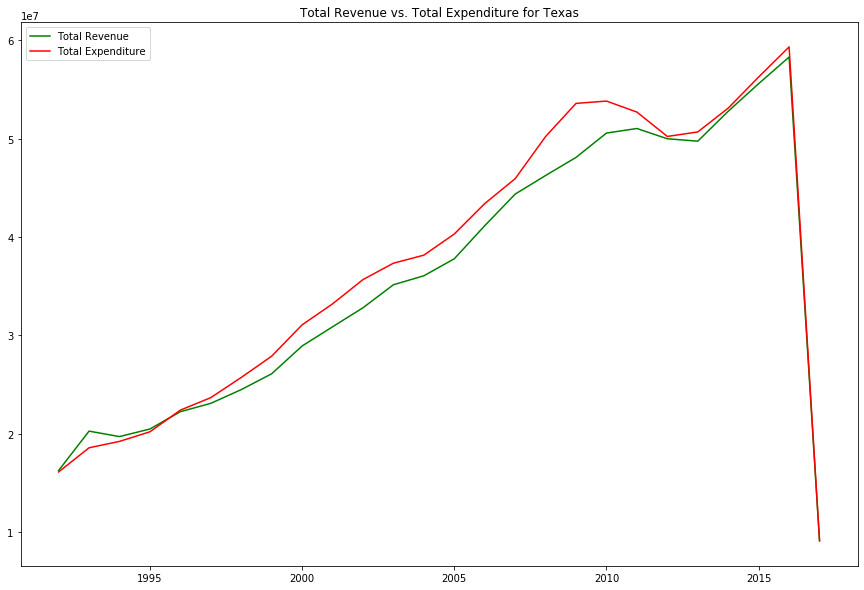

In [123]:
# Plot figure
plt.figure(figsize = (15, 10))
plt.plot(texas_total_rev['YEAR'], texas_total_rev['TOTAL_REVENUE'], label='Total Revenue', color='g')
plt.plot(texas_total_exp['YEAR'], texas_total_exp['TOTAL_EXPENDITURE'], label='Total Expenditure', color='r')
plt.title('Total Revenue vs. Total Expenditure for Texas')
plt.legend()
plt.show()

With the exception of the first year(s), it appears Texas has been operating at a budget deficit (total expenditures is greater than total revenue). In 2015, Governor Abbot of Texas signed a historical budget for 2016 and 2017, which cut taxes and moved around funds to different departments. A cut in taxes means the government doesn't have nearly as much money to use for expenditures, which would help explain the deep dive in the graph.

### In your chosen state, which of the lessons are the students more successful, math or reading? 

In [128]:
texas[['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,11.000000,11.000000,11.000000,10.000000
mean,237.215740,280.455403,216.931348,264.998531
std,7.888225,8.005144,2.153449,3.357866
min,217.918744,264.592828,212.394311,259.631360
25%,234.985976,275.949332,215.870253,262.433075
50%,240.943671,282.320510,216.932242,265.414883
75%,241.958603,286.277893,218.527334,266.951425
max,244.002472,290.346709,219.604313,270.700537


Students in Texas are more successful in math.

### What are the distributions of the math and reading scores in the sample? 

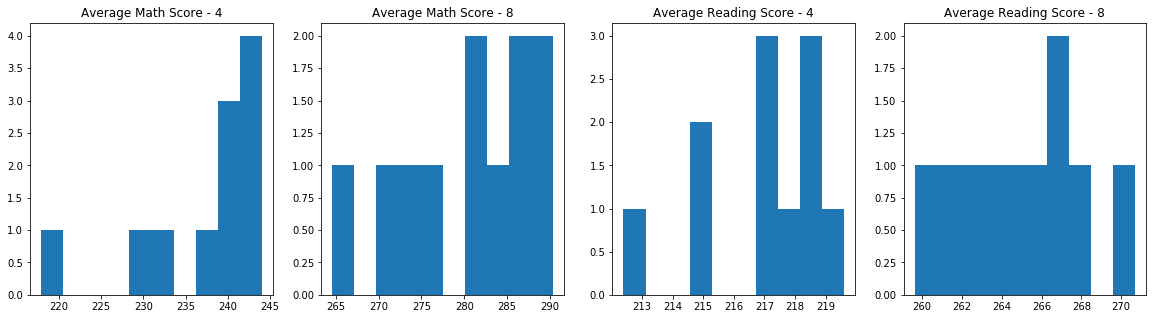

In [133]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 4, 1)
plt.hist(texas['AVG_MATH_4_SCORE'])
plt.title('Average Math Score - 4')

plt.subplot(1, 4, 2)
plt.hist(texas['AVG_MATH_8_SCORE'])
plt.title('Average Math Score - 8')

plt.subplot(1, 4, 3)
plt.hist(texas['AVG_READING_4_SCORE'])
plt.title('Average Reading Score - 4')

plt.subplot(1, 4, 4)
plt.hist(texas['AVG_READING_8_SCORE'])
plt.title('Average Reading Score - 8')

plt.show()

### Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [143]:
columns_median = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
    
for column in columns_median:
    edu2[column].fillna(edu2[column].mean(), inplace=True)

In [144]:
texas2 = edu2[edu2['STATE'] == 'TEXAS']

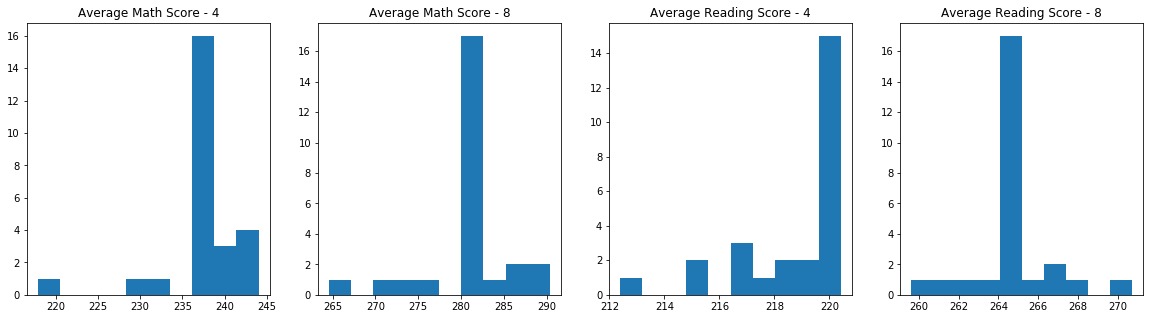

In [145]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 4, 1)
plt.hist(texas2['AVG_MATH_4_SCORE'])
plt.title('Average Math Score - 4')

plt.subplot(1, 4, 2)
plt.hist(texas2['AVG_MATH_8_SCORE'])
plt.title('Average Math Score - 8')

plt.subplot(1, 4, 3)
plt.hist(texas2['AVG_READING_4_SCORE'])
plt.title('Average Reading Score - 4')

plt.subplot(1, 4, 4)
plt.hist(texas2['AVG_READING_8_SCORE'])
plt.title('Average Reading Score - 8')

plt.show()